In [226]:
import sklearn
import numpy as np

np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [227]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


In [228]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

pol_svm_clf = Pipeline([
    ('pol_feat', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))
])

pol_svm_clf.fit(X, y)

c:\users\khaimov\pycharmprojects\ml-learn\venv\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('pol_feat', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [229]:
x1s = np.linspace(-1.5, 2.5, 100)
x2s = np.linspace(-1, 1.5, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_gen = np.c_[x1.ravel(), x2.ravel()]

y_gen_pred = pol_svm_clf.predict(X_gen).reshape(x1.shape)
y_gen_decision = pol_svm_clf.decision_function(X_gen).reshape(x1.shape)

Text(0, 0.5, '$x_2$')

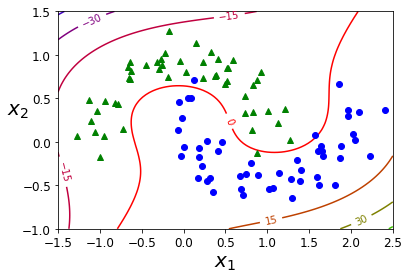

In [254]:
CS = plt.contour(x1, x2, y_gen_decision, cmap=plt.cm.brg)
plt.clabel(CS, inline=1, fontsize=10)

plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20, rotation=0)

blues = X[y == 1]
greens = X[y == 0]

plt.plot(blues[:, 0], blues[:, 1], 'bo')
plt.plot(greens[:, 0], greens[:, 1], 'g^')
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20, rotation=0)
